### Анализ прибыльности рейсов
загружаем .csv файл для дальнейшего анализа

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('project_4_data.csv')

In [37]:
df.head(5)

,flight_id,departure_airport,arrival_airport,flight_duration,model,passenger_capacity,actually_passengers,flight_income,fuel_cost
0,136119,AAQ,SVO,101.0,Boeing 737-300,130,113,1653000.0,190288.04
1,136120,AAQ,SVO,99.0,Boeing 737-300,130,109,1605400.0,186519.96
2,136122,AAQ,SVO,100.0,Boeing 737-300,130,97,1431000.0,188404.00
3,136130,AAQ,SVO,99.0,Boeing 737-300,130,107,1556600.0,186519.96
4,136131,AAQ,SVO,99.0,Boeing 737-300,130,124,1812800.0,186519.96


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight_id            118 non-null    int64  
 1   departure_airport    118 non-null    object 
 2   arrival_airport      118 non-null    object 
 3   flight_duration      118 non-null    float64
 4   model                118 non-null    object 
 5   passenger_capacity   118 non-null    int64  
 6   actually_passengers  118 non-null    int64  
 7   flight_income        118 non-null    float64
 8   fuel_cost            118 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 8.4+ KB


Из 127 рейсов из Анапы зимой 2017 после объединения таблиц в запросе осталось 118. По-видимому, отсеялись рейсы без пассажиров. 
Посмотрим заполняемость рейса пассажирами:

In [39]:
df['occupancy_by_passengers'] = round(
    df.actually_passengers/df.passenger_capacity, 2)

In [40]:
df.sample(5)

,flight_id,departure_airport,arrival_airport,flight_duration,model,passenger_capacity,actually_passengers,flight_income,fuel_cost,occupancy_by_passengers
16,136204,AAQ,SVO,100.0,Boeing 737-300,130,107,1457800.0,188404.000000,0.82
25,136269,AAQ,SVO,100.0,Boeing 737-300,130,109,1605400.0,188404.000000,0.84
66,136630,AAQ,EGO,50.0,Sukhoi Superjet-100,97,94,746400.0,66726.416667,0.97
9,136164,AAQ,SVO,99.0,Boeing 737-300,130,120,1738400.0,186519.960000,0.92
91,136781,AAQ,EGO,50.0,Sukhoi Superjet-100,97,97,765300.0,66726.416667,1.00


## Дополнительные данные
Учитывая, что цель данного проекта - найти наименее прибыльные рейсы, важно уточнить расходы на рейс.
В исходной базе данных нет бухгалтерской информации о расходах по статьям на рейс, поэтому
дополним наши данные информацией из открытых источников.
Пример структуры расходов на авиарейс из публикации

https://www.rbc.ru/newspaper/2015/09/03/56bca2d89a7947299f72bbf0

Цитата:
"Основные статьи расходов, формирующие себестоимость авиабилета, составляет обслуживание пассажиров, багажа и воздушных судов в аэропорту — 26%. Примерно столько же тратится на авиационное топливо. Затраты на ремонт и техническое обслуживание воздушных судов, страхование и лизинг занимают 16%. Следующая статья расходов — фонд оплаты труда, он составляет примерно 10%. Половину от фонда оплаты труда занимают затраты на рекламу и административные расходы — по 5%. Столько же тратится на комиссии и сборы. Аэронавигационные сборы и метеообеспечение составляют 4%. Оставшиеся 8% приходятся на амортизацию."

Т.е. примем расходы на топливо 26% в общей структуре расходов на рейс.
Отсюда ориентировочно полные расходы на рейс total_cost = fuel_cost/0.26

In [41]:
df['total_cost'] = round(df['fuel_cost']/0.26)

чистая прибыль с рейса (за минусом НДС 15.25%):

In [42]:
df['net_profit'] = round((df['flight_income'] - df['total_cost'])*(1-0.1525))

отсортируем рейсы по чистой прибыли:

In [43]:
df = df.sort_values(by='net_profit')

In [44]:
df

,flight_id,departure_airport,arrival_airport,flight_duration,model,passenger_capacity,actually_passengers,flight_income,fuel_cost,occupancy_by_passengers,total_cost,net_profit
93,136807,AAQ,EGO,50.0,Sukhoi Superjet-100,97,68,531000.0,66726.416667,0.70,256640.0,232520.0
68,136642,AAQ,EGO,49.0,Sukhoi Superjet-100,97,64,531000.0,65391.888333,0.66,251507.0,236870.0
100,136844,AAQ,EGO,50.0,Sukhoi Superjet-100,97,79,575100.0,66726.416667,0.81,256640.0,269895.0
107,136887,AAQ,EGO,49.0,Sukhoi Superjet-100,97,78,595200.0,65391.888333,0.80,251507.0,291280.0
111,136922,AAQ,EGO,50.0,Sukhoi Superjet-100,97,76,607800.0,66726.416667,0.78,256640.0,297608.0
...,...,...,...,...,...,...,...,...,...,...,...,...
46,136423,AAQ,SVO,100.0,Boeing 737-300,130,129,1849400.0,188404.000000,0.99,724631.0,953242.0
43,136403,AAQ,SVO,100.0,Boeing 737-300,130,129,1873800.0,188404.000000,0.99,724631.0,973921.0
42,136389,AAQ,SVO,100.0,Boeing 737-300,130,129,1873800.0,188404.000000,0.99,724631.0,973921.0
19,136226,AAQ,SVO,100.0,Boeing 737-300,130,130,1886000.0,188404.000000,1.00,724631.0,984260.0


установим новые индексы и построим график по чистой прибыли:

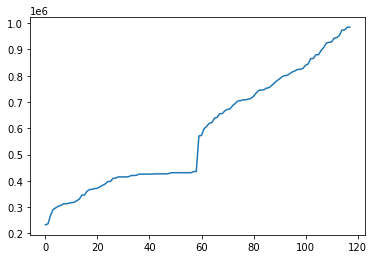

In [45]:
df.reset_index(level=0, inplace=True)
df['index1'] = df.index
plt.plot(df['index1'], df['net_profit'])

видим скачок в чистой прибыли в районе 60-го по порядку рейса. Посмотрим поближе:

In [55]:
df.loc[55:65]

,index,flight_id,departure_airport,arrival_airport,flight_duration,model,passenger_capacity,actually_passengers,flight_income,fuel_cost,occupancy_by_passengers,total_cost,net_profit,index1
55,84,136755,AAQ,EGO,50.0,Sukhoi Superjet-100,97,97,765300.0,66726.416667,1.00,256640.0,431089.0,55
56,91,136781,AAQ,EGO,50.0,Sukhoi Superjet-100,97,97,765300.0,66726.416667,1.00,256640.0,431089.0,56
57,85,136757,AAQ,EGO,49.0,Sukhoi Superjet-100,97,97,765300.0,65391.888333,1.00,251507.0,435440.0,57
58,86,136758,AAQ,EGO,49.0,Sukhoi Superjet-100,97,97,765300.0,65391.888333,1.00,251507.0,435440.0,58
59,54,136464,AAQ,SVO,100.0,Boeing 737-300,130,100,1398000.0,188404.000000,0.77,724631.0,570680.0,59
60,21,136250,AAQ,SVO,101.0,Boeing 737-300,130,99,1407800.0,190288.040000,0.76,731877.0,572845.0,60
61,2,136122,AAQ,SVO,100.0,Boeing 737-300,130,97,1431000.0,188404.000000,0.75,724631.0,598648.0,61
62,12,136178,AAQ,SVO,99.0,Boeing 737-300,130,99,1434600.0,186519.960000,0.76,717384.0,607841.0,62
63,38,136360,AAQ,SVO,100.0,Boeing 737-300,130,97,1455400.0,188404.000000,0.75,724631.0,619327.0,63
64,16,136204,AAQ,SVO,100.0,Boeing 737-300,130,107,1457800.0,188404.000000,0.82,724631.0,621361.0,64


Видно, что чистая прибыль на рейсах "Боингов" существенно выше.
Отсюда вывод первый: сокращаем рейсы "Sukhoi Superjet-100". Если кардинально - то все 59 рейсов этой модели самолета.
Это будут рейсы с flight_id:

In [63]:
a = df.loc[0:58]['flight_id']
print(list(a))

[136807, 136642, 136844, 136887, 136922, 136823, 136620, 136937, 136888, 136645, 136678, 136936, 136609, 136767, 136666, 136838, 136660, 136709, 136769, 136861, 136729, 136855, 136632, 136780, 136951, 136754, 136706, 136733, 136612, 136956, 136630, 136802, 136669, 136720, 136571, 136907, 136778, 136672, 136649, 136661, 136819, 136586, 136900, 136605, 136927, 136815, 136827, 136841, 136654, 136953, 136600, 136875, 136871, 136869, 136857, 136755, 136781, 136757, 136758]


Вывод второй: если не так революционно, а, например, 10 самых малоприбыльных рейсов, то это будут рейсы с flight_id:

In [62]:
b = df.loc[0:9]['flight_id']
print(list(b))

[136807, 136642, 136844, 136887, 136922, 136823, 136620, 136937, 136888, 136645]


# выводы и рекомендации
В результате анализа чистой прибыли 118-ти авиарейсов из Анапы в зимний период 2017 определены наименее прибыльные рейсы. Рассматривались только рейсы, на которых были пассажиры. Все рейсы на самолетах модели "Sukhoi Superjet-100" заменто менее прибыльны, чем все рейсы модели "Boeing 737-300".
Отсюда 2 рекомендации, в зависимотси от политики авиакомпании:
1. Если к сокращению подходить жестко, то нужно упразднить все 59 рейсов на самолетах модели "Sukhoi Superjet-100". Номера этих рейсов flight_id:
   
136807, 136642, 136844, 136887, 136922, 136823, 136620, 136937, 136888, 136645, 136678, 136936, 136609, 136767, 136666, 136838, 136660, 136709, 136769, 136861, 136729, 136855, 136632, 136780, 136951, 136754, 136706, 136733, 136612, 136956, 136630, 136802, 136669, 136720, 136571, 136907, 136778, 136672, 136649, 136661, 136819, 136586, 136900, 136605, 136927, 136815, 136827, 136841, 136654, 136953, 136600, 136875, 136871, 136869, 136857, 136755, 136781, 136757, 136758.

2. Если в политике более умеренный подход, то можно сократить определенное количество рейсов модели "Sukhoi Superjet-100" в ранжированном по возрастанию чистой прибыли списке. Например, первые 10 рейсов, чистая прибыль от которых не превышает 30% от максимальной в датасете. Номера этих рейсов flight_id:

136807, 136642, 136844, 136887, 136922, 136823, 136620, 136937, 136888, 136645

